<a href="https://colab.research.google.com/github/seansothey/CSC685/blob/master/Project6_Unsupervised_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn.educba.com/academy/wp-content/uploads/2019/10/Unsupervised-Machine-Learning.jpg)

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

**Image Datasets:**


*   Bridge:  
*   Coil-100: The dataset contains 7200 color images of 100 objects (72 images per object) https://www.cs.columbia.edu/CAVE/software/softlib/coil-100.php

*   Celeb:
*   Magnets: 


**Learning Methods:** 


*   K-Means clustering
*   RandomForest Classifier
*   GuassianMixture Classifier
*   Anomaly Detection Using GuassianMixture







# Setup

In [0]:
# Common Import
import sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

# sklearn version > 0.20 is required 
sklearn.__version__
# Update sklearn -> !pip install -U scikit-learn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.22.2.post1'

# Clustering Bridge Image Dataset

##Data Scrubing

## Loading Data

In [0]:
bridge = pd.read_csv('https://raw.githubusercontent.com/seansothey/CSC685/master/bridge.txt', delim_whitespace=True, header=None) #avoid spaces separated

In [0]:
bridge.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6,8,6,9,0,0,0,0,0,0,0,0,0,0,0,0
1,7,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0
2,8,8,8,18,31,12,22,34,74,74,68,60,96,99,104,79
3,9,9,16,34,11,15,38,54,60,22,65,75,99,78,92,114
4,9,19,34,39,23,26,31,39,16,31,34,41,59,63,33,38


In [0]:
bridge.shape

(4096, 16)

In [0]:
bridge.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [0]:
bridge_np = np.array(bridge) #convert dataframe to numpy array

In [0]:
bridge_np

array([[  6,   8,   6, ...,   0,   0,   0],
       [  7,   4,   3, ...,   0,   0,   0],
       [  8,   8,   8, ...,  99, 104,  79],
       ...,
       [251, 247, 243, ..., 127, 141, 153],
       [252, 250, 249, ...,  92,  94,  99],
       [253, 224, 209, ..., 246, 233, 227]])

In [0]:
bridge4x4 = bridge_np.reshape(4096,4,4)

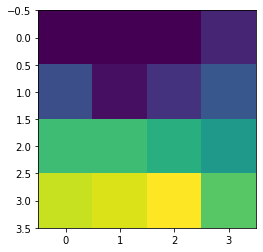

In [0]:
plt.imshow(bridge4x4[2]) #view the image index=2

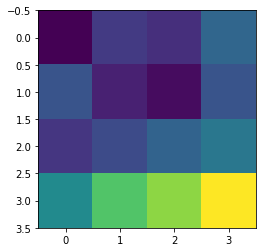

In [0]:
plt.imshow(bridge4x4[10]) #view the image index=10

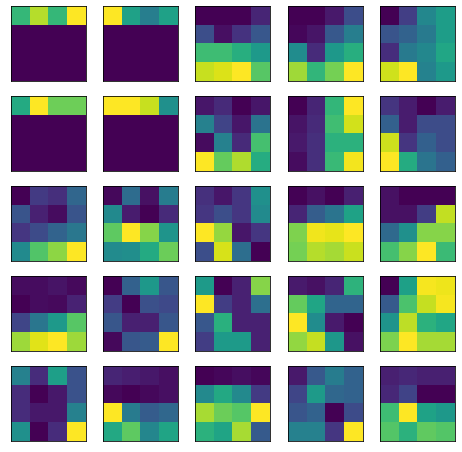

In [0]:
# See 25 images
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(bridge4x4[i])

Text(0.5, 1.0, 'Bridge Dataset')

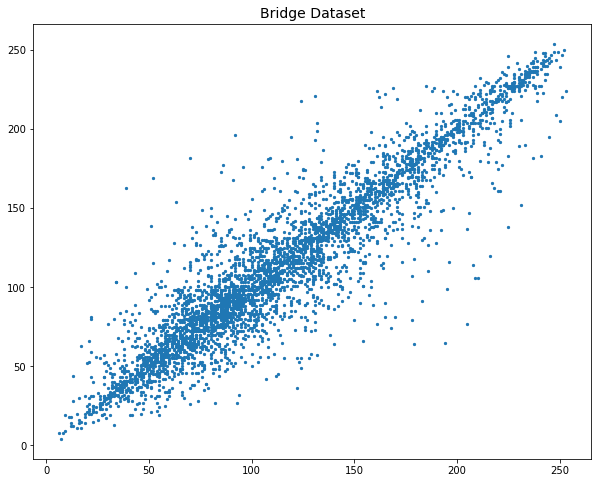

In [0]:
# See the whole dataset in 2d axis 
plt.figure(figsize=(10,8))
plt.scatter(bridge_np[:,0], bridge_np[:,1], s=5)
plt.title("Bridge Dataset", fontsize=14)

Generate isotropic Gaussian blobs for clustering

In [0]:
X_bridge, y_bridge = make_blobs(n_samples=len(bridge), random_state=42)

In [0]:
np.unique(y_bridge) #See how many labels was generated

array([0, 1, 2])

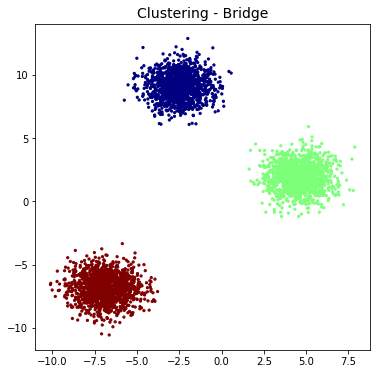

In [0]:
# Plot see the brief clusters 
plt.figure(figsize=(6,6))
plt.scatter(X_bridge[:, 0], X_bridge[:, 1], c=y_bridge, s=5, cmap='jet')
plt.title("Clustering - Bridge", fontsize=14)
plt.show()

Therefore, the number of clusters should be 3.

##Plot K-Elbow

In [0]:
kmeans=[KMeans(n_clusters=k, random_state=42).fit(X_bridge) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans]

Text(0.5, 1.0, 'K - Elbow')

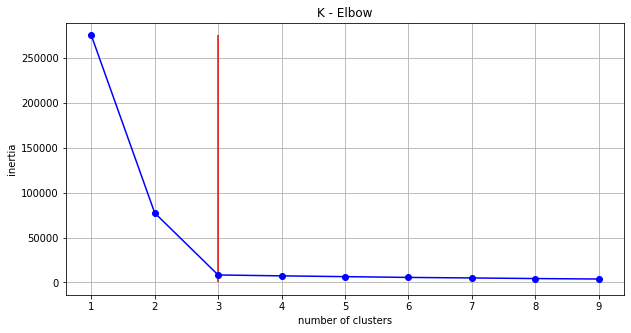

In [0]:
ax=plt.figure(figsize=(10,5))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.vlines(3,0,np.max(inertias),color='red')
plt.title("K - Elbow")

As expected, the elbow point is k=3

## Plot the silhouette score vs performance of $k$

In [0]:
silhouette_scores = [silhouette_score(X_bridge, model.labels_)
                     for model in kmeans[1:]]
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]
best_model = kmeans[best_index]

Text(0.5, 1.0, 'Performance of $K$')

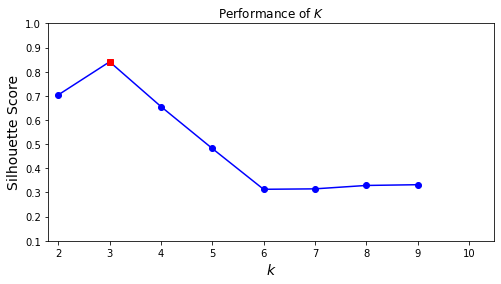

In [0]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.plot(3, best_score, "rs")
plt.axis([1.8, 10.5, 0.1, 1.0])
plt.title("Performance of $K$")

This visualization is clear to confirms that $k=3$ is the best choice.

## K-Means Clustering

### Fit and Predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [0]:
kmodel = KMeans(n_clusters=3, random_state=42)

In [0]:
y = kmodel.fit_predict(X_bridge)

In [0]:
y

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

In [0]:
len(y)

4096

In [0]:
y is kmodel.labels_

True

Therefore, y_pred is the label (0, 1, 2) tha represents for each cluster.

Note that the `KMeans` instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [0]:
kmodel.labels_

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

Of course, we can predict the labels of new instances:

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [0]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

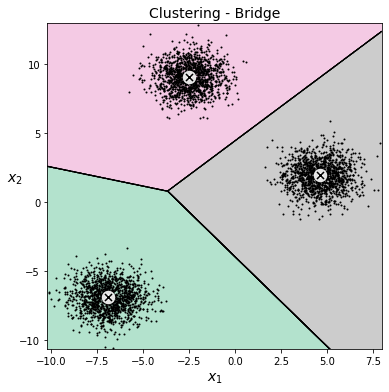

In [0]:
plt.figure(figsize=(6, 6))
plot_decision_boundaries(kmodel, X_bridge)
plt.title("Clustering - Bridge", fontsize=14)
plt.show()

##With RandomForest Classifier

## Spliting data for training and testing set in ratio 70%-30%

In [0]:
X_bridge_train, X_bridge_test, y_bridge_train, y_bridge_test = train_test_split(X_bridge, y, test_size=0.3, shuffle = True, random_state=42)

In [0]:
X_bridge_train.shape, X_bridge_test.shape, y_bridge_train.shape, y_bridge_test.shape

((2867, 2), (1229, 2), (2867,), (1229,))

Create the model and fit with the training set

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF_bridge = RandomForestClassifier(random_state=42)
RF_bridge.fit(X_bridge_train, y_bridge_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Perform cross validation using subset size 500

In [0]:
cross_val_score(RF_bridge, X_bridge_train[:500], y_bridge_train[:500], cv=3, scoring='accuracy').mean()

1.0

Test the model using testing set

In [0]:
RF_bridge.score(X_bridge_test, y_bridge_test)

1.0

See the predict score

In [0]:
y_pred = RF_bridge.predict(X_bridge)
y_pred

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

In [0]:
accuracy_score(y, y_pred)

1.0

See the confustion matrix

In [0]:
labels = ['0', '1', '2']

Text(0.5, 1.0, 'Confusion Matrix')

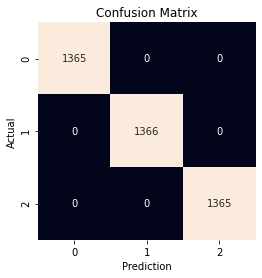

In [0]:
mat = confusion_matrix(y_pred, y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

See how RF classify the first 25 images

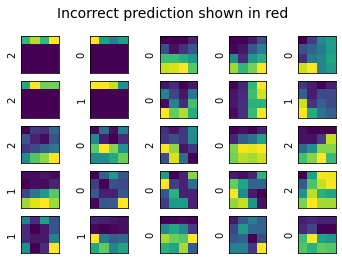

In [0]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(bridge4x4[i])
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(labels[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y[i] else 'red')
fig.suptitle('Incorrect prediction shown in red', size=14);

There's no red number popup, that mean 100% rate prediction as expected.

##Use K-Means as a dimensionality reduction tool and train a classifier on the reduced set

In [0]:
X_train_reduced = best_model.transform(X_bridge_train)
X_test_reduced = best_model.transform(X_bridge_test)

Perform cross validation using subset size 500

In [0]:
cross_val_score(RF_bridge, X_train_reduced[:500], y_bridge_train[:500], cv=3, scoring='accuracy').mean()

0.9020032224707212

Fit to training model

In [0]:
RF_bridge.fit(X_train_reduced, y_bridge_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Test the model using testing set

In [0]:
RF_bridge.score(X_test_reduced, y_bridge_test)

0.9023596419853539

The performance produce higher error when using K-Means as dimensionality reduction.

## Search for the number of clusters that provides the best performance.

In [0]:
from sklearn.pipeline import Pipeline

for n_clusters in range(1,11):
    pipe_bridge = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    pipe_bridge.fit(X_bridge_train, y_bridge_train)
    print(n_clusters, pipe_bridge.score(X_bridge_test, y_bridge_test))

1 0.6517493897477624
2 0.8966639544344996
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0


## This can be seen clearly that, n_clusters = 3 provides the best performance.

##With Gaussian Mixtures

Apply PCA (99% variataion)

In [0]:
pca = PCA(0.99)
X_bridge_pca = pca.fit_transform(X_bridge)

Let's train a Gaussian mixture model on the training set

In [0]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_bridge_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Let's look at the parameters that the EM algorithm estimated:

In [0]:
gm.weights_

array([0.33325195, 0.33349609, 0.33325195])

In [0]:
gm.means_

array([[ 9.76841849, -1.04822152],
       [-6.49080233, -4.23657971],
       [-3.27286099,  5.28790496]])

Did the algorithm actually converge?

In [0]:
gm.converged_

True

Yes, good. How many iterations did it take?

In [0]:
gm.n_iter_

2

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster.

In [0]:
gm.predict(X_bridge_pca)

array([2, 0, 0, ..., 2, 0, 0])

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [0]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

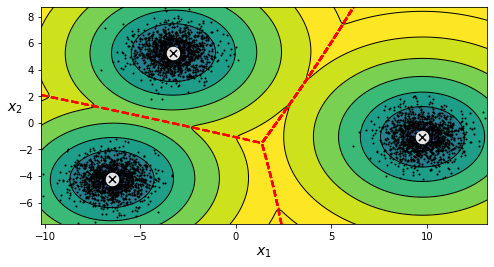

In [0]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_bridge_pca)
plt.show()

## Anomaly Detection using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [0]:
densities = gm.score_samples(X_bridge_pca)
density_threshold = np.percentile(densities, 4)
anomalies = X_bridge_pca[densities < density_threshold]

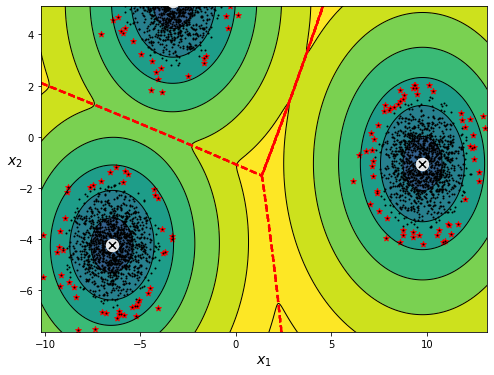

In [0]:
plt.figure(figsize=(8, 6))

plot_gaussian_mixture(gm, X_bridge_pca)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

# Clustering Coil-100 Image Dataset

##Data Scrubing

## Loading Data

Download Coil100 from Sean Kaggle

In [0]:
import os
import tarfile
import random
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import urllib
import urllib.parse as parse

In [0]:
def download(url,save_path,target_file_name=''):
  print("file is being downloading from {} ...".format(url))
  file = urllib.request.urlopen(url)
  fileData = file.read()

  if target_file_name=='':
    split=parse.urlsplit(url)
    target_file_name = split.path.split('/')[-1]
  
  if not os.path.exists(save_path):
    os.mkdir(save_path)

  targetFile = os.path.join(save_path,target_file_name)
  with open(targetFile,'wb') as f:
    f.write(fileData)
  print('Done, file in the path {}'.format(targetFile))

In [0]:
def extractTar(tar_file_path,target_path):
    print("Start extracting....")
    tar=tarfile.open(tar_file_path)
    tar.extractall(target_path)
    tar.close()
    print("Done")

In [0]:
def extractZip(tar_file_path,target_path):
    print("Start extracting....")
    zFile=ZipFile(tar_file_path)
    zFile.extractall(target_path)
    zFile.close()
    print("Done")

In [0]:
root_path = 'data'
os.mkdir(root_path)

In [0]:
download('https://storage.googleapis.com/kaggle-data-sets/589973/1063434/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586506868&Signature=OeomkNazrVOV6QMP6sd%2BMUJITjJSg0lk5tIpWhJOwU4c4VCK7E3PxxEKlovk4x8XBGKmtL90cQUy5BoQSo%2BdulwmSx41RqZYkRHPMyvhgydFX0wAol%2Fy75828DdowN37isM04sYFTD4PleKuj7hD95bFWvv1mKSh0w%2BIZAEaMsS6bOvqPpXkJYN1G8mffLUFWpKGklEX6Y4ERiMGhIlQBp9RH1WHAYSyoreld0g02%2FkrVzub8i%2B9D1sOPfG%2F8VfXgxyVoACA2lSRJycZ7me2wuAmBLx%2FlhivpHI2dLZ%2BBymxtmxhvDnDioxDl7wwQqYqy9MMUAlXPZPvlMJ%2Baf%2FaLQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcoil100.zip',os.path.join(root_path,'coil100'),'coil100.zip')

file is being downloading from https://storage.googleapis.com/kaggle-data-sets/589973/1063434/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586506868&Signature=OeomkNazrVOV6QMP6sd%2BMUJITjJSg0lk5tIpWhJOwU4c4VCK7E3PxxEKlovk4x8XBGKmtL90cQUy5BoQSo%2BdulwmSx41RqZYkRHPMyvhgydFX0wAol%2Fy75828DdowN37isM04sYFTD4PleKuj7hD95bFWvv1mKSh0w%2BIZAEaMsS6bOvqPpXkJYN1G8mffLUFWpKGklEX6Y4ERiMGhIlQBp9RH1WHAYSyoreld0g02%2FkrVzub8i%2B9D1sOPfG%2F8VfXgxyVoACA2lSRJycZ7me2wuAmBLx%2FlhivpHI2dLZ%2BBymxtmxhvDnDioxDl7wwQqYqy9MMUAlXPZPvlMJ%2Baf%2FaLQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcoil100.zip ...
Done, file in the path data/coil100/coil100.zip


In [0]:
extractZip('data/coil100/coil100.zip', 'data/coil100/imgs')

Start extracting....
Done


In [0]:
coil_100 = os.listdir('data/coil100/imgs/coil-100')

In [0]:
len(coil_100)

7202

In [0]:
# Remove files that are not image
for item in coil_100:
    if not item.endswith('.png'):
        os.remove((coil_100, item))

In [0]:
len(coil_100)

7202

In [0]:
# Plot to see some images of the dataset
for i in range(10):
  rndIndx = random.randint(0,len(coil_100)-1)
  img = cv2.imread(os.path.join('data/coil100/imgs/coil-100',coil_100[rndIndx]))
  cv2_imshow(img)


Generate isotropic Gaussian blobs for clustering

In [0]:
X_coil100, y_coil100 = make_blobs(n_samples=len(coil_100), centers=100, random_state=42, )

In [0]:
X_coil100.shape, y_coil100.shape

((7202, 2), (7202,))

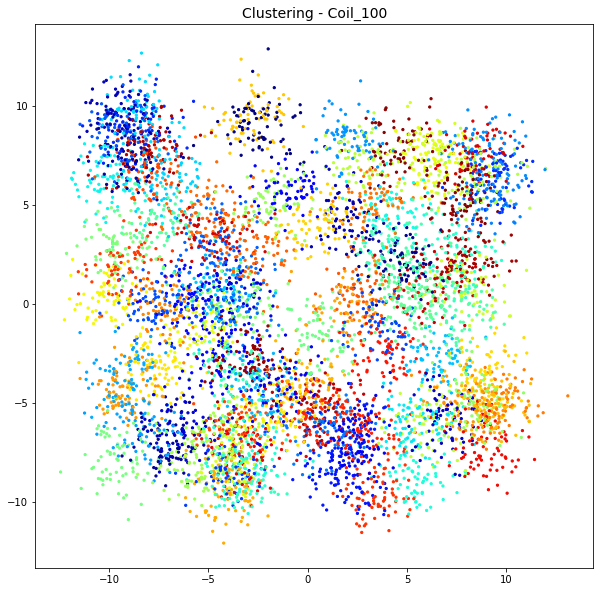

In [0]:
# Plot see the brief clusters 
plt.figure(figsize=(10,10))
plt.scatter(X_coil100[:, 0], X_coil100[:, 1], c=y_coil100, s=5, cmap='jet')
plt.title("Clustering - Coil_100", fontsize=14)
plt.show()

Therefore, the number of clusters should be 3.

##Plot K-Elbow

In [0]:
kmeans =[KMeans(n_clusters=k, random_state=42).fit(X_coil100) for k in range(10,150,10)]
inertias = [model.inertia_ for model in kmeans]

Text(0.5, 1.0, 'K - Elbow')

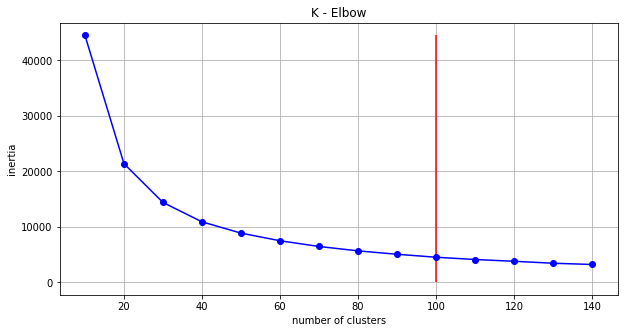

In [0]:
ax=plt.figure(figsize=(10,5))
plt.plot(range(10,150,10),inertias,"bo-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.vlines(100,0,np.max(inertias),color='red')
plt.title("K - Elbow")

###The elbow point is k=100

## K-Means Clustering

### Fit and Predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [0]:
kmodel = KMeans(n_clusters=100, random_state=42)

In [0]:
y = kmodel.fit_predict(X_coil100)

In [0]:
y

array([99,  6, 59, ..., 17, 57, 73], dtype=int32)

In [0]:
len(y)

7202

In [0]:
y is kmodel.labels_

True

Therefore, y is the label (1, 2,..,100) tha represents for each cluster.

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [0]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

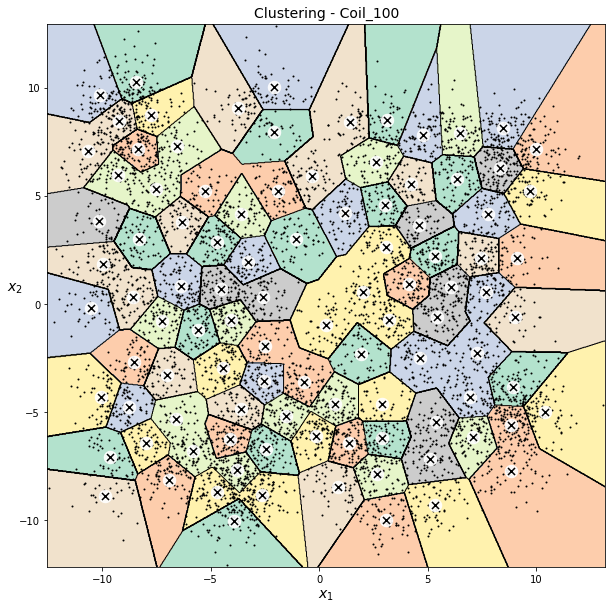

In [0]:
plt.figure(figsize=(10, 10))
plot_decision_boundaries(kmodel, X_coil100)
plt.title("Clustering - Coil_100", fontsize=14)
plt.show()

##With RandomForest Classifier

## Spliting data for training and testing set in ratio 70%-30%

In [0]:
X_coil100_train, X_coil100_test, y_coil100_train, y_coil100_test = train_test_split(X_coil100, y, test_size=0.3, shuffle = True, random_state=42)

In [0]:
X_coil100_train.shape, X_coil100_test.shape, y_coil100_train.shape, y_coil100_test.shape

((5041, 2), (2161, 2), (5041,), (2161,))

Create the model and fit with the training set

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF_bridge = RandomForestClassifier(random_state=42)
RF_bridge.fit(X_coil100_train, y_coil100_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Perform cross validation using subset size 500

In [0]:
cross_val_score(RF_bridge, X_coil100[:500], y[:500], cv=3, scoring='accuracy').mean()

0.7580020681528509

Test the model using testing set

In [0]:
RF_bridge.score(X_coil100_test, y_coil100_test)

0.94447015270708

See the predict score

In [0]:
y_pred = RF_bridge.predict(X_coil100)
y_pred

array([99,  6, 59, ..., 17, 57, 73], dtype=int32)

In [0]:
accuracy_score(y, y_pred)

0.9833379616773119

See the confustion matrix

In [0]:
labels = str(np.arange(1, 101).tolist())

Text(0.5, 1.0, 'Confusion Matrix')

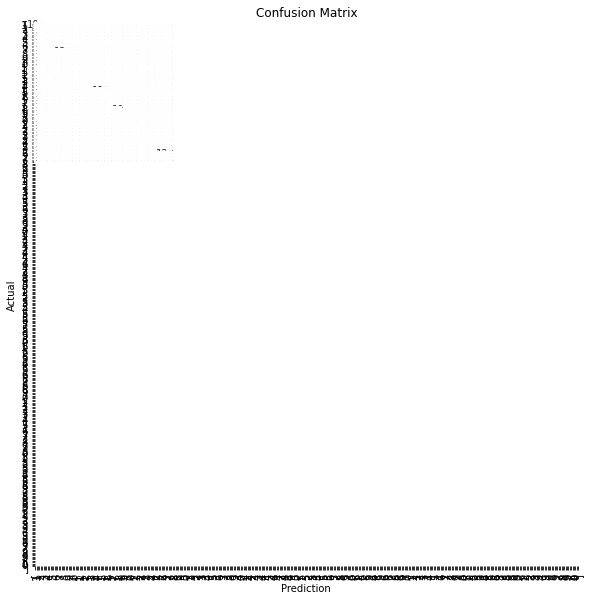

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
mat = confusion_matrix(y_pred, y)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',
            cbar=False, ax=ax,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Prediction')
plt.ylabel('Actual');
plt.title('Confusion Matrix')

See how RF classify the first 25 images

TypeError: ignored

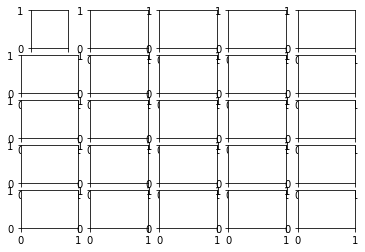

In [0]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(os.path.join('data/coil100/imgs/coil-100', coil_100[i]))
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(labels[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y[i] else 'red')
fig.suptitle('Incorrect prediction shown in red', size=14);

There's no red number popup, that mean 100% rate prediction as expected.

##Use K-Means as a dimensionality reduction tool and train a classifier on the reduced set

In [0]:
X_train_coil100_reduced = best_model.transform(X_coil100_train)
X_test_coil100_reduced = best_model.transform(X_coil100_test)

Perform cross validation using subset size 500

In [0]:
cross_val_score(RF_bridge, X_train_coil100_reduced[:500], y_coil100_train[:500], cv=3, scoring='accuracy').mean()

0.5919847052882189

Fit to training model

In [0]:
RF_bridge.fit(X_train_coil100_reduced, y_coil100_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Test the model using testing set

In [0]:
RF_bridge.score(X_test_coil100_reduced, y_coil100_test)

0.6621934289680703

The performance produce higher error when using K-Means as dimensionality reduction.

## Search for the number of clusters that provides the best performance.

In [0]:
from sklearn.pipeline import Pipeline

for n_clusters in range(10,150,10):
    pipe = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    pipe.fit(X_coil100_train, y_coil100_train)
    print(n_clusters, pipe.score(X_coil100_test, y_coil100_test))

10 0.957427117075428
20 0.967144840351689
30 0.963442850532161
40 0.970846830171217
50 0.965756594169366
60 0.963442850532161
70 0.96760758907913
80 0.965756594169366
90 0.9648310967144841
100 0.96760758907913
110 0.968533086534012
120 0.9699213327163351
130 0.968533086534012
140 0.966682091624248


### All n_clusters provides similar erformance.

##With Gaussian Mixtures

Apply PCA (99% variataion)

In [0]:
pca = PCA(0.99)
X_pca = pca.fit_transform(X_coil100)

Let's train a Gaussian mixture model on the training set

In [0]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=100, n_init=10, random_state=42)
gm.fit(X_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=100, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Did the algorithm actually converge?

In [0]:
gm.converged_

True

Yes, good. How many iterations did it take?

In [0]:
gm.n_iter_

8

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [0]:
gm.predict(X_pca)

array([69,  2, 22, ..., 75, 97, 85])

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [0]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

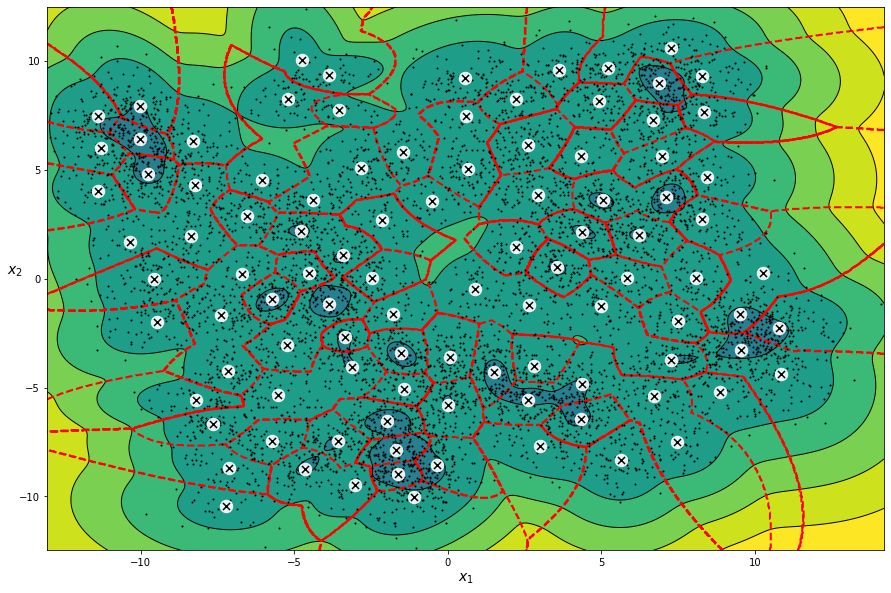

In [0]:
plt.figure(figsize=(15, 10))
plot_gaussian_mixture(gm, X_pca)
plt.show()

## Anomaly Detection using Gaussian Mixtures

Assume the threshold is 10%

In [0]:
densities = gm.score_samples(X_pca)
density_threshold = np.percentile(densities, 10)
anomalies = X_pca[densities < density_threshold]

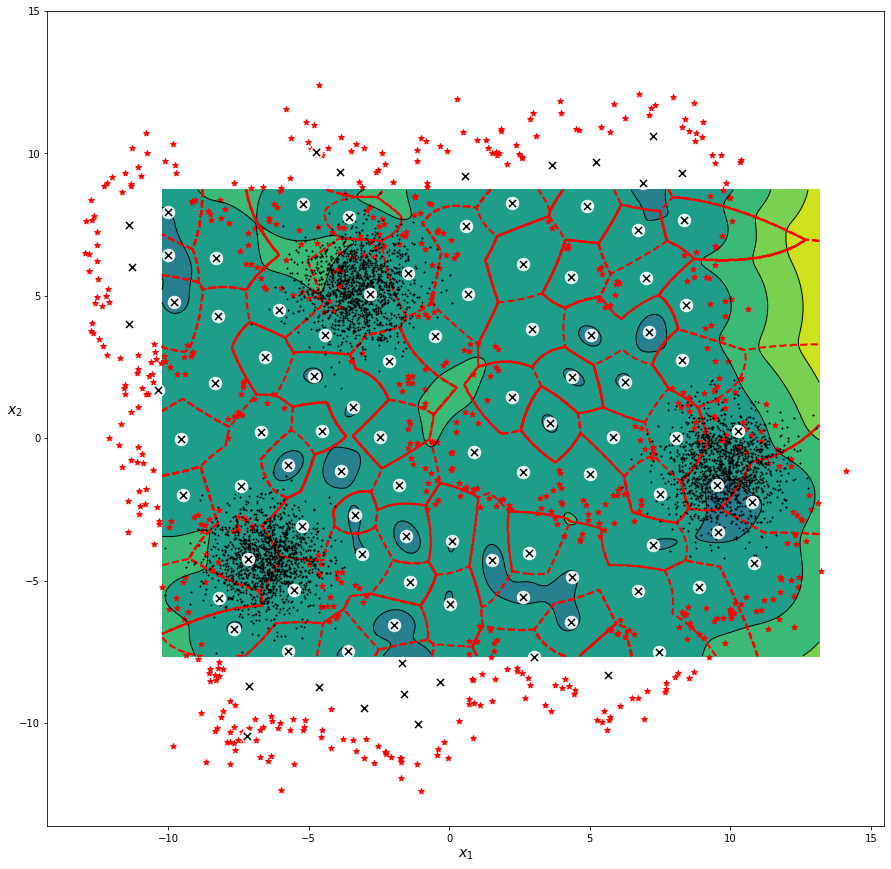

In [0]:
plt.figure(figsize=(15, 15))

plot_gaussian_mixture(gm, X_bridge_pca)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=15)
plt.show()